# 01 Import Libraries and Dataframe

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Import Orders, Products, & Customers dataframe
data_path = r'/Users/Nick/Documents/CareerFoundry/Immersion 4/Instacart Basket Analysis 11.11.21/02 Data/Prepared Data' 
ords_prods_cust = pd.read_pickle(os.path.join(data_path, 'orders_products_customers.pkl'))

In [3]:
pd.options.display.max_columns = 40

In [4]:
ords_prods_cust.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_item_price,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy day,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy day,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy day,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy day,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy day,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423


In [5]:
#Drop irrelevant columns
opc_drop_list = ['add_to_cart_order', 'reordered', 'aisle_id', 'busiest_day']
ords_prods_cust = ords_prods_cust.drop(columns = opc_drop_list)
#Check update
ords_prods_cust.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_item_price,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,Soda,7,9.0,Mid-range product,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
1,2398795,1,2,3,7,15.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
2,473747,1,3,3,12,21.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
3,2254736,1,4,4,7,29.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
4,431534,1,5,4,15,28.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423


#### The columns were successfully dropped.

# 02 Crosstab Example

In [6]:
#Check to see whether all null values in days_since_prior_order
#correspond to customers' first orders
crosstab = pd.crosstab(ords_prods_cust['days_since_prior_order'],
                       ords_prods_cust['order_number'], dropna = False)
#Copy crosstab to clipboard to view in Excel
crosstab.to_clipboard()

#### Seen in Excel, zeros throughout the order_number = 1 column supports assumption about the missing values in the days_since_prior_order column

# 03 Task

## 03.01 Address PII

#### I deleted First Name and Surname columns in last exercise, as I found the information irrelevant as well as a breach of privacy.

## 03.02 Create region Column

In [7]:
#Check elements in state column
ords_prods_cust['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

#### There are no misspellings. States are capitalized and can contain spaces (e.g.: Rhode Island). District of Columbia is its own entity. There are no null values.

In [8]:
#Create list variable for each region
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts',
             'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania',
             'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio',
           'North Dakota', 'South Dakota', 'Nebraska', 'Kansas',
           'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia',
         'West Virginia', 'North Carolina', 'South Carolina', 'Georgia',
         'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama',
         'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado',
        'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon',
        'California', 'Hawaii']

In [9]:
#Test function on portion of dataframe

pd.options.display.max_rows = 100
#Set dataframe portion
df = ords_prods_cust[['order_id', 'state']].head(100)
#Create region column with if statement using loc()
df.loc[df['state'].isin(Northeast), 'region'] = 'Northeast'
df.loc[df['state'].isin(Midwest), 'region'] = 'Midwest'
df.loc[df['state'].isin(South), 'region'] = 'South'
df.loc[df['state'].isin(West), 'region'] = 'West'

In [10]:
#Check test
df

,order_id,state,region
0,2539329,Alabama,South
1,2398795,Alabama,South
2,473747,Alabama,South
3,2254736,Alabama,South
4,431534,Alabama,South
5,3367565,Alabama,South
6,550135,Alabama,South
7,3108588,Alabama,South
8,2295261,Alabama,South
9,2550362,Alabama,South


#### Only had two states to look at, but it worked for those two.

In [11]:
#Apply function to entire dataframe
ords_prods_cust.loc[ords_prods_cust['state'].isin(Northeast),
                    'region'] = 'Northeast'
ords_prods_cust.loc[ords_prods_cust['state'].isin(Midwest),
                    'region'] = 'Midwest'
ords_prods_cust.loc[ords_prods_cust['state'].isin(South),
                    'region'] = 'South'
ords_prods_cust.loc[ords_prods_cust['state'].isin(West),
                    'region'] = 'West'

In [12]:
#Check for null values in new region column
ords_prods_cust['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

#### There are no null values in the region column.

## 03.03 Examine Regional Spending Habits

In [13]:
#Cross region with spending flag
cross_region_spending = pd.crosstab(ords_prods_cust['region']
                                    , ords_prods_cust['spending_flag']
                                    , dropna = False)
cross_region_spending.to_clipboard()

#### Examing (in Excel) the ratio of low spenders to high spenders in each region, the Midwest has relatively more high spenders than the other regions, while the Northeast has relatively more low spenders than the other regions.

## 03.04 Exclude Low-Activity Customers

In [14]:
#Create activity flag using max orders
ords_prods_cust.loc[ords_prods_cust['max_order'] < 5
                    , 'activity_flag'] = 'Low activity'
ords_prods_cust.loc[ords_prods_cust['max_order'] >= 5
                    , 'activity_flag'] = 'active'
#Show count and check for nulls
ords_prods_cust['activity_flag'].value_counts(dropna = False)

active          30964564
Low activity     1440295
Name: activity_flag, dtype: int64

#### There are no null values in the activity_flag column.

In [15]:
#Create active subset (exclude low-activity customers)
ords_prods_cust_active = ords_prods_cust[ords_prods_cust['activity_flag']
                                         == 'active']
#Ensure all customers in subset are active
ords_prods_cust_active['activity_flag'].value_counts(dropna = False)

active    30964564
Name: activity_flag, dtype: int64

#### All customers in active subset are indeed active.

In [16]:
#Drop activity_flag column, as it is no longer neccessary
ords_prods_cust_active = ords_prods_cust_active.drop(columns
                                                     = ['activity_flag'])

In [17]:
#Ensure activity_flag column dropped
ords_prods_cust_active.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_item_price,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,n_dependants,fam_status,income,region
0,2539329,1,1,2,8,NaN,196,Soda,7,9.0,Mid-range product,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South
2,473747,1,3,3,12,21.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South
4,431534,1,5,4,15,28.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South


#### The activity_flag is no longer present.

## 03.05 Profile Customers

### Income Flag

In [18]:
#Find income distribution percentiles
ords_prods_cust_active['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [19]:
#Create income_flag column with loc if statement

#Lower-tier < 25 percentile
ords_prods_cust_active.loc[ords_prods_cust_active['income'] < 67292
                           , 'income_flag'] = 'Lower-tier'
#Lower-middle-tier >= 25 percentile, < 50 percentile
ords_prods_cust_active.loc[(ords_prods_cust_active['income'] >= 67292) 
                           & (ords_prods_cust_active['income'] < 96765)
                           , 'income_flag'] = 'Lower-middle-tier'
#Upper-middle-tier >= 50 percentile, < 75 percentile
ords_prods_cust_active.loc[(ords_prods_cust_active['income'] >= 96765) 
                           & (ords_prods_cust_active['income'] < 128102)
                           , 'income_flag'] = 'Upper-middle-tier'
#Upper-tier >= 75 percentile
ords_prods_cust_active.loc[ords_prods_cust_active['income'] >= 128102
                           , 'income_flag'] = 'Upper-tier'

In [20]:
#Check income_flag values
ords_prods_cust_active['income_flag'].value_counts(dropna = False)

Upper-middle-tier    7742166
Upper-tier           7741261
Lower-tier           7741005
Lower-middle-tier    7740132
Name: income_flag, dtype: int64

#### There are no null values, and each value count is near equal, indicating that the split mocks the desired quartile split. Values that are equal to the quartile boundaries account for differences the equality of the value counts.

### Age Flag

In [21]:
#Find age distribution percentiles
ords_prods_cust_active['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [22]:
#Create age_flag

#Young < 25 percentile
ords_prods_cust_active.loc[ords_prods_cust_active['age'] < 33
                           , 'age_flag'] = 'Young'
#Middle-aged >= 25 percentile, < 75 percentile
ords_prods_cust_active.loc[(ords_prods_cust_active['age'] >= 33) 
                           & (ords_prods_cust_active['age'] < 65)
                           , 'age_flag'] = 'Middle-aged'
#Senior >= 75 percentile
ords_prods_cust_active.loc[ords_prods_cust_active['age'] >= 65
                           , 'age_flag'] = 'Senior'

In [23]:
#Check age_flag values
ords_prods_cust_active['age_flag'].value_counts(dropna = False)

Middle-aged    15483886
Senior          8195544
Young           7285134
Name: age_flag, dtype: int64

#### There are no null values and the count split is logical.

### Dependents Flag

In [24]:
#Correct n_dependants column spelling
ords_prods_cust_active.rename(columns = {'n_dependants':'n_dependents'}
                              , inplace = True)

In [25]:
#Find n_dependents statistics
ords_prods_cust_active['n_dependents'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependents, dtype: float64

In [26]:
#Create dependents_flag

#Non-parent
ords_prods_cust_active.loc[ords_prods_cust_active['n_dependents'] == 0
                           , 'dependents_flag'] = 'Non-parent'
#Parent
ords_prods_cust_active.loc[ords_prods_cust_active['n_dependents'] > 0
                           , 'dependents_flag'] = 'Parent'

In [27]:
#Check dependents_flag values
ords_prods_cust_active['dependents_flag'].value_counts(dropna = False)

Parent        23224883
Non-parent     7739681
Name: dependents_flag, dtype: int64

#### No null values.

### Shopping Habits Flag

In [28]:
#Create department-type lists
food_bev = [1, 3, 4, 5, 6, 7, 9, 12, 13, 14, 15, 16, 19, 20]
non_food = [2, 8, 10, 11, 17, 18, 21]

In [29]:
#Create department_flag


#Food and beverage
ords_prods_cust_active.loc[ords_prods_cust_active['department_id'].isin(food_bev)
                           , 'department_flag'] = 'Food and Beverage'
#Non-food items
ords_prods_cust_active.loc[ords_prods_cust_active['department_id'].isin(non_food)
                           , 'department_flag'] = 'Non-food'

In [30]:
#Check department_flag values
ords_prods_cust_active['department_flag'].value_counts(dropna = False)

Food and Beverage    29204319
Non-food              1760245
Name: department_flag, dtype: int64

#### All items are food and beverage or non-food. There are no null values.

#### Create count column for each department_flag, grouped by user_id

In [31]:
#Create subset with only food and bev
df_fb = ords_prods_cust_active[ords_prods_cust_active['department_flag']
                               == 'Food and Beverage']

In [32]:
#Create subset with only non-food
df_nf = ords_prods_cust_active[ords_prods_cust_active['department_flag']
                               == 'Non-food']

In [33]:
#Create food_bev_count column
ords_prods_cust_active['food_bev_count'] = df_fb.groupby(['user_id'])['department_flag'].transform('count')
#Creat non_food_count column
ords_prods_cust_active['non_food_count'] = df_nf.groupby(['user_id'])['department_flag'].transform('count')

In [34]:
#Check that new columns are in dataframe
ords_prods_cust_active.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_item_price,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,n_dependents,fam_status,income,region,income_flag,age_flag,dependents_flag,department_flag,food_bev_count,non_food_count
0,2539329,1,1,2,8,NaN,196,Soda,7,9.0,Mid-range product,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,NaN
1,2398795,1,2,3,7,15.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,NaN
2,473747,1,3,3,12,21.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,NaN
3,2254736,1,4,4,7,29.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,NaN
4,431534,1,5,4,15,28.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,NaN


#### There are innaccurate null values. Food purchase rows were not affected by the creation of the non_food_count column because the non-food subset did not contain those rows. A similar case is true for the non-food purchase rows.

#### To correct this, we update the count columns below with the column's mean, grouped by user_id, as this mean is equal to the user's purchase count because the mean calculation is unaffected by null values (max would worked, too). This replaces null values with the proper count. 

#### Note that some values may remain null if the user has never made a purchase in the corresponding category.

In [35]:
#Update food_bev_count column
ords_prods_cust_active['food_bev_count'] = ords_prods_cust_active.groupby(['user_id'])['food_bev_count'].transform(np.mean)
#Update non_food_count column
ords_prods_cust_active['non_food_count'] = ords_prods_cust_active.groupby(['user_id'])['non_food_count'].transform(np.mean)

In [36]:
#Check the count columns of user 1
ords_prods_cust_active[ords_prods_cust_active['user_id'] == 1]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_item_price,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,n_dependents,fam_status,income,region,income_flag,age_flag,dependents_flag,department_flag,food_bev_count,non_food_count
0,2539329,1,1,2,8,NaN,196,Soda,7,9.0,Mid-range product,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,2.0
1,2398795,1,2,3,7,15.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,2.0
2,473747,1,3,3,12,21.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,2.0
3,2254736,1,4,4,7,29.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,2.0
4,431534,1,5,4,15,28.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,2.0
5,3367565,1,6,2,7,19.0,196,Soda,7,9.0,Mid-range product,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,2.0
6,550135,1,7,1,9,20.0,196,Soda,7,9.0,Mid-range product,Busier day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,2.0
7,3108588,1,8,1,14,14.0,196,Soda,7,9.0,Mid-range product,Busier day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,2.0
8,2295261,1,9,1,16,0.0,196,Soda,7,9.0,Mid-range product,Busier day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,2.0
9,2550362,1,10,4,8,30.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,2.0


#### Note that before user 1 had a food_bev_count of 57 and a null non_food_count in row 1. Now, the non_food_count everywhere is 2 due to the 2 non-food purchases user 1 made.

#### Now, we classify users according to the ratio of their department group counts

In [37]:
#Create food_bev_count to non_food_count proportion
ords_prods_cust_active['food_nonfood_proportion'] = (ords_prods_cust_active['food_bev_count'])/(ords_prods_cust_active['non_food_count'])

In [38]:
#Check for proportion column
ords_prods_cust_active.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_item_price,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,n_dependents,fam_status,income,region,income_flag,age_flag,dependents_flag,department_flag,food_bev_count,non_food_count,food_nonfood_proportion
0,2539329,1,1,2,8,NaN,196,Soda,7,9.0,Mid-range product,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,2.0,28.5
1,2398795,1,2,3,7,15.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,2.0,28.5
2,473747,1,3,3,12,21.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,2.0,28.5
3,2254736,1,4,4,7,29.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,2.0,28.5
4,431534,1,5,4,15,28.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,2.0,28.5


In [39]:
#Find statistics of proportion column
ords_prods_cust_active['food_nonfood_proportion'].describe()

count    2.814591e+07
mean     5.454349e+01
std      9.529550e+01
min      2.343750e-02
25%      1.144444e+01
50%      2.506383e+01
75%      5.800000e+01
max      2.305000e+03
Name: food_nonfood_proportion, dtype: float64

In [40]:
#Create shopping_habits_flag

#Typical shopper has proportion btwn 25 and 75 percentiles
# >= 11.44444 and < 58
ords_prods_cust_active.loc[(ords_prods_cust_active['food_nonfood_proportion'] >= 11.44444) 
             & (ords_prods_cust_active['food_nonfood_proportion'] < 58)
             , 'shopping_habits_flag'] = 'Typical Shopper'
#Shopper that favors food and beverage items has proportion >= 75 percentile
# >= 58
ords_prods_cust_active.loc[ords_prods_cust_active['food_nonfood_proportion'] >= 58
             , 'shopping_habits_flag'] = 'Favors Food and Beverage Items'
#Shopper that favors non-food items has proportion < 25 percentile but >= 1
# < 11.44444 and >= 1
ords_prods_cust_active.loc[(ords_prods_cust_active['food_nonfood_proportion'] < 11.44444)
             & (ords_prods_cust_active['food_nonfood_proportion'] >= 1)
             , 'shopping_habits_flag'] = 'Favors Non-food Items'
#Shopper that heavily favors non-food items has proportion < 1
ords_prods_cust_active.loc[ords_prods_cust_active['food_nonfood_proportion'] < 1
             , 'shopping_habits_flag'] = 'Heavily Favors Non-food Items'
#Only buys non-food items has a null food_bev_count
ords_prods_cust_active.loc[ords_prods_cust_active['food_bev_count'].isnull()
             , 'shopping_habits_flag'] = 'Non-food Items Only'
#Only buys food and beverage items has a null non_food_count
ords_prods_cust_active.loc[ords_prods_cust_active['non_food_count'].isnull()
             , 'shopping_habits_flag'] = 'Food and Beverage Items Only'

In [41]:
#Check values
ords_prods_cust_active['shopping_habits_flag'].value_counts(dropna = False)

Typical Shopper                   14055202
Favors Food and Beverage Items     7057549
Favors Non-food Items              6942264
Food and Beverage Items Only       2817549
Heavily Favors Non-food Items        90895
Non-food Items Only                   1105
Name: shopping_habits_flag, dtype: int64

#### There are no null values.

#### Now, we create a profile flag, which is the concatenation of each customer's string values for the flags we just made.

In [42]:
#Reminder on names of columns
ords_prods_cust_active.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_item_price,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,n_dependents,fam_status,income,region,income_flag,age_flag,dependents_flag,department_flag,food_bev_count,non_food_count,food_nonfood_proportion,shopping_habits_flag
0,2539329,1,1,2,8,NaN,196,Soda,7,9.0,Mid-range product,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,2.0,28.5,Typical Shopper
1,2398795,1,2,3,7,15.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,2.0,28.5,Typical Shopper
2,473747,1,3,3,12,21.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,2.0,28.5,Typical Shopper
3,2254736,1,4,4,7,29.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,2.0,28.5,Typical Shopper
4,431534,1,5,4,15,28.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,2.0,28.5,Typical Shopper


In [43]:
#Create a 100-row subset to test a .format() string aggregation approach
df1 = ords_prods_cust_active[['user_id', 'income_flag', 'age_flag', 'dependents_flag', 'shopping_habits_flag']].head(100)
#Check the subset
df1.head()

,user_id,income_flag,age_flag,dependents_flag,shopping_habits_flag
0,1,Lower-tier,Young,Parent,Typical Shopper
1,1,Lower-tier,Young,Parent,Typical Shopper
2,1,Lower-tier,Young,Parent,Typical Shopper
3,1,Lower-tier,Young,Parent,Typical Shopper
4,1,Lower-tier,Young,Parent,Typical Shopper


In [44]:
#Test
df1['profile'] = df1.agg('{0[income_flag]} income, {0[age_flag]} {0[dependents_flag]}, {0[shopping_habits_flag]}'.format, axis = 1)
df1

,user_id,income_flag,age_flag,dependents_flag,shopping_habits_flag,profile
0,1,Lower-tier,Young,Parent,Typical Shopper,"Lower-tier income, Young Parent, Typical Shopper"
1,1,Lower-tier,Young,Parent,Typical Shopper,"Lower-tier income, Young Parent, Typical Shopper"
2,1,Lower-tier,Young,Parent,Typical Shopper,"Lower-tier income, Young Parent, Typical Shopper"
3,1,Lower-tier,Young,Parent,Typical Shopper,"Lower-tier income, Young Parent, Typical Shopper"
4,1,Lower-tier,Young,Parent,Typical Shopper,"Lower-tier income, Young Parent, Typical Shopper"
5,1,Lower-tier,Young,Parent,Typical Shopper,"Lower-tier income, Young Parent, Typical Shopper"
6,1,Lower-tier,Young,Parent,Typical Shopper,"Lower-tier income, Young Parent, Typical Shopper"
7,1,Lower-tier,Young,Parent,Typical Shopper,"Lower-tier income, Young Parent, Typical Shopper"
8,1,Lower-tier,Young,Parent,Typical Shopper,"Lower-tier income, Young Parent, Typical Shopper"
9,1,Lower-tier,Young,Parent,Typical Shopper,"Lower-tier income, Young Parent, Typical Shopper"


#### Above approach was successful

In [45]:
#Apply .format() string aggregation to entire dataframe
#ords_prods_cust_active['profile'] = ords_prods_cust_active.agg('{0[income_flag]} income, {0[age_flag]} {0[dependents_flag]}, {0[shopping_habits_flag]}'.format, axis = 1)
#ords_prods_cust_active.head()

KeyboardInterrupt: 

#### The above method took too much time with the large dataframe. It had not finished executing after an hour.

In [46]:
#Test list comprehension method
df1['profile_1'] = [p1 + ' income, ' + p2 + ' ' + p3 + ', ' + p4
                    for p1, p2, p3, p4 
                    in zip(df1['income_flag'], df1['age_flag']
                           , df1['dependents_flag']
                           , df1['shopping_habits_flag'])]
df1

,user_id,income_flag,age_flag,dependents_flag,shopping_habits_flag,profile,profile_1
0,1,Lower-tier,Young,Parent,Typical Shopper,"Lower-tier income, Young Parent, Typical Shopper","Lower-tier income, Young Parent, Typical Shopper"
1,1,Lower-tier,Young,Parent,Typical Shopper,"Lower-tier income, Young Parent, Typical Shopper","Lower-tier income, Young Parent, Typical Shopper"
2,1,Lower-tier,Young,Parent,Typical Shopper,"Lower-tier income, Young Parent, Typical Shopper","Lower-tier income, Young Parent, Typical Shopper"
3,1,Lower-tier,Young,Parent,Typical Shopper,"Lower-tier income, Young Parent, Typical Shopper","Lower-tier income, Young Parent, Typical Shopper"
4,1,Lower-tier,Young,Parent,Typical Shopper,"Lower-tier income, Young Parent, Typical Shopper","Lower-tier income, Young Parent, Typical Shopper"
5,1,Lower-tier,Young,Parent,Typical Shopper,"Lower-tier income, Young Parent, Typical Shopper","Lower-tier income, Young Parent, Typical Shopper"
6,1,Lower-tier,Young,Parent,Typical Shopper,"Lower-tier income, Young Parent, Typical Shopper","Lower-tier income, Young Parent, Typical Shopper"
7,1,Lower-tier,Young,Parent,Typical Shopper,"Lower-tier income, Young Parent, Typical Shopper","Lower-tier income, Young Parent, Typical Shopper"
8,1,Lower-tier,Young,Parent,Typical Shopper,"Lower-tier income, Young Parent, Typical Shopper","Lower-tier income, Young Parent, Typical Shopper"
9,1,Lower-tier,Young,Parent,Typical Shopper,"Lower-tier income, Young Parent, Typical Shopper","Lower-tier income, Young Parent, Typical Shopper"


#### List comprehension method produces the same result on sample dataframe.

In [47]:
#Apply list comprehension method to entire dataframe
ords_prods_cust_active['profile_1'] = [p1 + ' income, ' + p2 + ' ' + p3 + ', ' + p4
                                       for p1, p2, p3, p4 
                                       in zip(ords_prods_cust_active['income_flag']
                                              , ords_prods_cust_active['age_flag']
                                              , ords_prods_cust_active['dependents_flag']
                                              , ords_prods_cust_active['shopping_habits_flag'])]
ords_prods_cust_active.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_item_price,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,n_dependents,fam_status,income,region,income_flag,age_flag,dependents_flag,department_flag,food_bev_count,non_food_count,food_nonfood_proportion,shopping_habits_flag,profile_1
0,2539329,1,1,2,8,NaN,196,Soda,7,9.0,Mid-range product,Regular day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,2.0,28.5,Typical Shopper,"Lower-tier income, Young Parent, Typical Shopper"
1,2398795,1,2,3,7,15.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,2.0,28.5,Typical Shopper,"Lower-tier income, Young Parent, Typical Shopper"
2,473747,1,3,3,12,21.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,2.0,28.5,Typical Shopper,"Lower-tier income, Young Parent, Typical Shopper"
3,2254736,1,4,4,7,29.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,2.0,28.5,Typical Shopper,"Lower-tier income, Young Parent, Typical Shopper"
4,431534,1,5,4,15,28.0,196,Soda,7,9.0,Mid-range product,Less busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,Lower-tier,Young,Parent,Food and Beverage,57.0,2.0,28.5,Typical Shopper,"Lower-tier income, Young Parent, Typical Shopper"


In [48]:
#Rename profile_1 to profile (whoops!)
ords_prods_cust_active.rename(columns = {'profile_1':'profile'}
                              , inplace = True)

## 03.06 Profile Distribution Bar Chart

<AxesSubplot:>

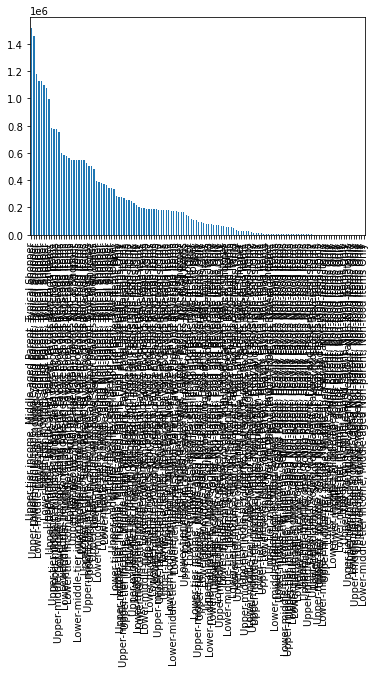

In [49]:
ords_prods_cust_active['profile'].value_counts().plot.bar()

#### The graph's x-axis labels are clunky due to vast amount of profiles

In [50]:
#Number of profile types
ords_prods_cust_active['profile'].nunique()

134

#### There are 134 profile types.

In [51]:
#Export profile value counts to .csv
ords_prods_cust_active['profile'].value_counts().reset_index().to_csv(os.path.join(data_path, 'cust_profile_count.csv'), index = False)

#### A Tableau treemap is best at visualizing the profile value counts.

## 03.07 Frequency and Expenditure Stats by Profile

In [52]:
#Number of orders stats
prof_ords_stat = ords_prods_cust_active.groupby('profile').agg({'order_number':['max', 'mean', 'min']})
prof_ords_stat.head()

order_number               
                                                            max       mean min
profile                                                                       
Lower-middle-tier income, Middle-aged Non-paren...           99  19.411666   1
Lower-middle-tier income, Middle-aged Non-paren...           99  16.833717   1
Lower-middle-tier income, Middle-aged Non-paren...           99  11.486900   1
Lower-middle-tier income, Middle-aged Non-paren...           56  19.939856   1
Lower-middle-tier income, Middle-aged Non-paren...            5   2.666667   1
...                                                         ...        ...  ..
Upper-tier income, Young Non-parent, Typical Sh...           67  17.896694   1
Upper-tier income, Young Parent, Favors Food an...           99  21.502000   1
Upper-tier income, Young Parent, Favors Non-foo...           99  22.151827   1
Upper-tier income, Young Parent, Food and Bever...           45   9.842368   1
Upper-tier income, Young Parent, Typical Shopper             99  20.286318   1

[134 rows x 3 columns]

In [54]:
#Product prices stats
prof_prices_stat = ords_prods_cust_active.groupby('profile').agg({'prices':['max', 'mean', 'min']})
prof_prices_stat.head()

prices               
                                                        max      mean  min
profile                                                                   
Lower-middle-tier income, Middle-aged Non-paren...  14900.0  8.841198  1.0
Lower-middle-tier income, Middle-aged Non-paren...  14900.0  8.073856  1.0
Lower-middle-tier income, Middle-aged Non-paren...     25.0  8.152093  1.0
Lower-middle-tier income, Middle-aged Non-paren...     24.9  7.892748  1.0
Lower-middle-tier income, Middle-aged Non-paren...     15.0  7.933333  4.4

## 03.08 Crosstab Profile and Region

#### Note: Department is included in profile, so only need to compare profile and region.

In [57]:
prof_cross_region = pd.crosstab(ords_prods_cust_active['region'], ords_prods_cust_active['profile'], dropna = False)
prof_cross_region.to_clipboard()

#### For the top 34 profiles (by customer count), which account for roughly two thirds of the accounts, there are no strong indications of different behaviors across regions. I examined this in Tableau.

## 03.09 Export Final Dataframe

In [58]:
#Export ords_prods_cust_active to .pkl
ords_prods_cust_active.to_pickle(os.path.join(data_path, 'ords_prods_cust_active_FINAL.pkl'))